In [2]:
!pip install emoji

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('../Dataset/Fake_train.csv')
val_df = pd.read_csv('../Dataset/Fake_dev.csv')
test_df = pd.read_csv("../Dataset/Fake_test_with_labels.csv")

In [5]:
with pd.option_context('display.max_colwidth', 0):
    display(train_df.sample(n=5))

,text,label
2780,എന്റെ ഒരു വോട്ട് 😭😭😭,original
1042,Medical mafia ..,Fake
2463,Stupid people don&#39;t know the importance of lives.,Fake
1656,😂😂😂 നല്ല അടിപൊളി വിവരണം,original
3069,"Kayyeennu poyi, ini paranittu karyamilla",Fake


In [6]:
train_df.shape ,val_df.shape,  test_df.shape

((3257, 2), (815, 2), (1019, 2))

In [10]:
train_df.groupby("label").size()

label
Fake        1599
original    1658
dtype: int64

In [11]:
val_df.groupby("label").size()

label
Fake        406
original    409
dtype: int64

In [12]:
test_df.groupby("label").size()

label
Fake        507
original    512
dtype: int64

In [14]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'

    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['text'].apply(lambda x: x.count('@'))
    df['url_count'] = df['text'].apply(count_urls)
    return df

df = preprocessing(train_df)
val_df = preprocessing(val_df)
test_df = preprocessing(test_df)

In [15]:
print(df['hashtag_count'].sum())
print(df['mentions_count'].sum())
print(df['url_count'].sum())

105
2
29


In [16]:
print(test_df['hashtag_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['url_count'].sum())

29
3
5


In [17]:
import re
import emoji

def remove_urls(text):
    """Remove URLs from the given text."""
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)
def handle_emojis(text):
    # Remove emojis
    text = emoji.replace_emoji(text, '')
    # OR keep emojis as text
    # text = emoji.demojize(text)
    return text
def remove_hashtags(text):
    """Remove hashtags from the given text."""
    if '#' in text:
        text = text.replace('#', '')
    hashtag_pattern = r'#\w+'
    return re.sub(hashtag_pattern, '', text)


def remove_mentions(text):
    """Remove mentions from the given text."""
    # Remove mentions with no space before
    if '@' in text:
        text = text.replace('@', '')

    mention_pattern = r'@\S+\b'
    text = re.sub(mention_pattern, '', text)
    # Check if the mention is at the end of the text
    if text.endswith(' @'):
        text = text[:-2]  # Remove the space and '@'

    return text
def remove_dollars(text):
    """Remove $ from the given text."""
    if "$" in text:
        text = text.replace('$','')
    return text
def remove_consecutive_punctuation(text):
    """Remove consecutive punctuation from the given text."""
    text = re.sub(r'([.,!?;:|]){2,}', r'\1', text)
    return str(text).lower()

def processing(text):
    """Clean the given tweet by removing URLs, hashtags, and mentions."""
    cleaned_text = remove_urls(text)
    cleaned_text = handle_emojis(cleaned_text)
    cleaned_text = remove_hashtags(cleaned_text)
    cleaned_text = remove_mentions(cleaned_text)
    cleaned_text = remove_dollars(cleaned_text)
    cleaned_text = remove_consecutive_punctuation(cleaned_text)
    return cleaned_text

In [18]:
df['text'] = df['text'].apply(lambda x: processing(x))
val_df['text'] = val_df['text'].apply(lambda x: processing(x))
test_df['text'] = test_df['text'].apply(lambda x: processing(x))

In [19]:
import re
def preprocessing(df):
    url_pattern = r'https?://\S+|www\.\S+'

    def count_urls(text):
        return len(re.findall(url_pattern, text))

    df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
    df['mentions_count'] = df['text'].apply(lambda x: x.count('@'))
    df['dollar_count'] = df['text'].apply(lambda x: x.count('$'))
    df['url_count'] = df['text'].apply(count_urls)
    return df

df = preprocessing(df)
val_df = preprocessing(val_df)
test_df = preprocessing(test_df)

In [20]:

print(df['url_count'].sum())
print(df['mentions_count'].sum())
print(df['hashtag_count'].sum())
print(df['dollar_count'].sum())

0
0
0
0


In [21]:
print(test_df['hashtag_count'].sum())
print(test_df['mentions_count'].sum())
print(test_df['url_count'].sum())
print(test_df['dollar_count'].sum())

0
0
0
0


In [22]:
with pd.option_context('display.max_colwidth', 0):
    display(df.sample(n=5))

,text,label,hashtag_count,mentions_count,url_count,dollar_count
2055,ഈ വാക്കുകൾ പൊന്നായിരിക്കട്ടെ,Fake,0,0,0,0
467,എൻ്റെ കൂടിനുകൊടുത്തവാക്ക് പാലിക്കാതിരിക്കാൻ എനിക്ക് കഴിയില്ല. മരണം സംഭവിക്കുന്നത് വിതിക്കപ്പെട്ടവർക്കാണ്. ഒരുവേളമര ണം തടഞ്ഞാലും. മറ്റൊരുരീതിയിൽ അവർ നഷ്ടപ്പെടും. ഇനിയും മരണങ്ങളുണ്ടാകും പ്രാർത്ഥന അതാണു രക്ഷ. ലോകജനം ഒന്നടങ്ങ് പ്രാർത്ഥിച്ചാൽ മരണം എന്നഅവസ്ഥയുടെ മൂർച്ചകുറയും. പ്രാത്ഥനനടക്കട്ടെ. !,Fake,0,0,0,0
333,pakisthanilum illa. pakisthanil kooduthal aalukal marikkilla. china pakisthanu marunnu koduthu. chinayude kaiyyil marunnum prathirodha marunnum undu. ithu china undakkiya virus. americayeyum europineyum thakarkkan. chinayile whuhanil mathrame corona ullu. mattu oru china citiyilum corona illa. chinayil ninnum 15000/20000 km akalayulla americayilum italiyilum engane virus ethi athe samayam whuhanu aduthulla oru sthalathum virus ethiyathum illa. ippol maskum mattu coronaye thadukkanulla pala vidha sadhanngalum chine lokam muzhuvan export cheythu billions sampadikkunnu. kurachu divasam kazhiyumpol coronakkulla marunnu kandu pidichu ennu paranju china varum (marunnu already avide undu) athu vittu avar billions sampadikkum. februaryil share market crash cheythu china billions sampadichathu. avarundakkiya virus. athinulla marunnum prathirodha marunnum kandu pidichathinu shesham mathramanu avar virus padarthiyathu.,Fake,0,0,0,0
3192,ഇ ഷർട്ട് യൂണിഫോം ആണോ,Fake,0,0,0,0
1051,വീണാ ജോർജിന് കോവിഡിനെ പേടിയില്ല<br>ആ ഭാഗത്ത് തേക്ക് ഇല്ലെന്ന്<br>രാജാവ്,original,0,0,0,0


In [23]:
with pd.option_context('display.max_colwidth', 0):
    display(test_df.sample(n=10))

,text,label,hashtag_count,mentions_count,url_count,dollar_count
785,മൂട്ടിൽ ആലു കിളിത വിജയൻ. അയാൾക് അത് തണൽ,original,0,0,0,0
664,കാരണവന്മാർക്ക് അടുപ്പിലും തൂറാം,original,0,0,0,0
556,njan saghavanu but partyk mukalil arum padilla paranja alu thanne pukazhthi paada. party evidrkka pone. appo p jayarajettane kurichu padiyapol enthe. party nadapadi eduthu.,original,0,0,0,0
857,it is very easy to defeat china .don&39;t buy any product from china then they revert to 1960 .let message to everyone in your circle,Fake,0,0,0,0
506,തിരുവാതിര കളിക്കാന്‍ parda ക്കാരെ ആരെയും കണ്ടില്ല. വനിതാ മതില്‍ kettiyappol അങ്ങനെ അല്ലായിരുന്നു.,original,0,0,0,0
550,ividathepole azhinjadan samathikkilla thattikkalayum,Fake,0,0,0,0
190,nakikalaaya malayalikal,original,0,0,0,0
244,ലോകത്തിൽ ഏറ്റവും കൂടുതൽ കൊറോണ രോഗികൾ ഉള്ള രാഷ്ട്രമായി ഇന്ത്യ മാറുന്നു. നമ്മൾ ഇപ്പോൾ പോകുന്നത് ഗുരുതര അവസ്ഥയിലാണ്. എല്ലാം രാഷ്ട്രങ്ങളും കൊറോണക്കെതിരെ ഒരുപാട് പ്രവർത്തനം നടത്തി. കൊറോണക്ക് മൂന്നു ഘട്ടം ഉണ്ട്. മൂന്നു തവണയായി അത് വന്നിരിക്കും. 2022വരെ കൊറോണ ഈ ഭൂമിയിൽ ഉണ്ടാകും.,Fake,0,0,0,0
1005,ivan ithu nale thirichum parayum.,Fake,0,0,0,0
687,youngsters keralthil vannalea without any party <br>keralam gods own country akathullu,original,0,0,0,0


In [25]:
df['Length'] = df['text'].apply(lambda x: len(x.split(" ")))

In [26]:
test_df['Length'] = test_df['text'].apply(lambda x: len(x.split(" ")))

In [27]:
df['Length'].describe()

count    3257.000000
mean       12.008290
std        20.076778
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max       570.000000
Name: Length, dtype: float64

In [28]:
df['text'].duplicated().sum()

93

In [29]:
df.isnull().sum()

text              0
label             0
hashtag_count     0
mentions_count    0
url_count         0
dollar_count      0
Length            0
dtype: int64

In [30]:
def countplot(fig_x,fig_y,col,top_x,rotation,xlabel,title) :
    plt.figure(figsize=(fig_x,fig_y))
    total = float(len(df))
    ax = sns.countplot(x=col,  data=df, order = df[col].value_counts().iloc[:top_x].index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),xytext = (x+0.05,y+20),ha = 'center',weight = 'bold',size = 11)
    plt.xticks(rotation = rotation,weight='bold',size = 10)
    plt.yticks(weight='bold',size = 10)
    plt.xlabel(xlabel,weight='bold',size = 12)
    plt.ylabel('count',weight='bold',size = 12)
    plt.title(title,weight='bold',size = 15)
    plt.show()

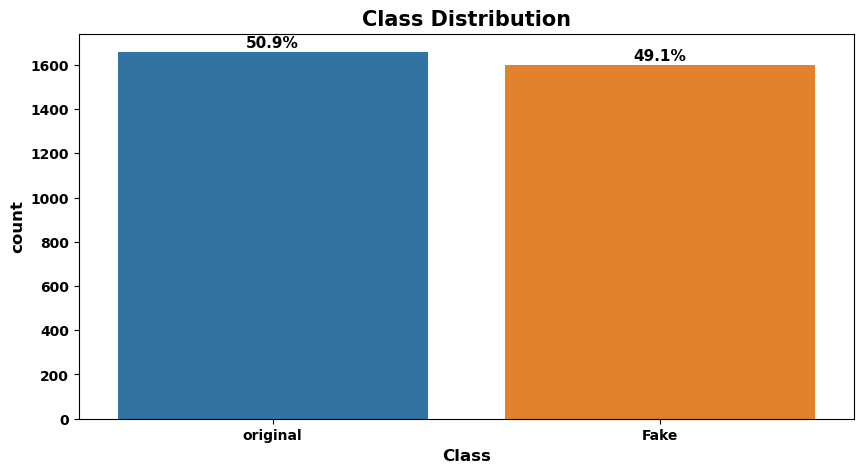

In [31]:
countplot(10,5,'label',15,0,'Class','Class Distribution')

In [32]:
df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [34]:
val_df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count'], inplace=True)
test_df.drop(columns=['hashtag_count', 'mentions_count', 'url_count', 'dollar_count','Length'], inplace=True)

In [35]:
df.columns

Index(['text', 'label'], dtype='object')

In [36]:
df.head()

,text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake
1,masha allah,Fake
2,അന്വേഷണം കഴിയുമ്പോൾ. c. a. a. യ്ക്ക് എതിരായ കല...,Fake
3,illathentha avaru purath vidayittalland verenth,Fake
4,barana pakshathin matoru niyamam.nalla moyanth...,original


In [38]:
df.to_csv("../Dataset/cleaned_train_binary.csv", index = False)
val_df.to_csv("../Dataset/cleaned_val_binary.csv", index = False)
test_df.to_csv("../Dataset/cleaned_test_binary.csv", index = False)